In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# https://valoriza.ipportalegre.pt/piaes/features-info-stats.html
# https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention?resource=download

# Lab One: Exploring Table Data
Machine Learning in Python<br/>
Diogo Benetti Faé Rodrigues<br/>
Alex Shockley<br/>
Jay Kynerd<br/>
02/07/2023

[1.5 points] In your own words, give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?). What is the prediction task for your data and why are other third parties interested in the result? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?
Be specific and use your own words to describe the aspects of the data.

## Business Understanding
Our dataset consists of several different features surrounding college students. The features can be broken down into four main sections: Demographic data, Socio-economic data, Macro-economic data, and Academic data. This dataset was created for academic use for gaining experience in using machine learning techniques to predict whether or not a student will succeed in a college environment. Success can be defined in several ways in this dataset, we will be focusing on predicting if a student will end up graduating, succeeding in college, or dropping out, not succeeding in college. Educational institutions may be interested in using a model that would predict graduation rate for several reasons. One might be that they want to check to see if someone is likely to graduate or not before giving them a scholarship. Another reason might be to determine if a university wants to admit a certain student. Our prediction algorithm would want to be about 75% accurate, it is not as important as something like medical data, but if a university is using this model to determine whether they should or should not give admission to a student, then we would want it to be more accurate.


# Data Understanding
Each attribute's value description can be found in the following link in detail:<br/>
https://valoriza.ipportalegre.pt/piaes/features-info-stats.html <br/><br/>
Let's start by reading the file and checking the data

In [2]:
data = pd.read_csv("Dropout.csv")
data.describe()



,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


First thing we should look into is if there are any missing values in the table.

In [3]:
# Create a dataframe where missing values are True and False otherwise
missing = data.isna()
# Sum how many missing entries there are
total_missing = missing.sum()
total_missing

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

Luckily, there are no missing values, so we can go straight to analyzing the data.

In [4]:
cols = data.columns
print(cols.values)

['Marital status' 'Application mode' 'Application order' 'Course'
 'Daytime/evening attendance' 'Previous qualification' 'Nacionality'
 "Mother's qualification" "Father's qualification" "Mother's occupation"
 "Father's occupation" 'Displaced' 'Educational special needs' 'Debtor'
 'Tuition fees up to date' 'Gender' 'Scholarship holder'
 'Age at enrollment' 'International' 'Curricular units 1st sem (credited)'
 'Curricular units 1st sem (enrolled)'
 'Curricular units 1st sem (evaluations)'
 'Curricular units 1st sem (approved)' 'Curricular units 1st sem (grade)'
 'Curricular units 1st sem (without evaluations)'
 'Curricular units 2nd sem (credited)'
 'Curricular units 2nd sem (enrolled)'
 'Curricular units 2nd sem (evaluations)'
 'Curricular units 2nd sem (approved)' 'Curricular units 2nd sem (grade)'
 'Curricular units 2nd sem (without evaluations)' 'Unemployment rate'
 'Inflation rate' 'GDP' 'Target']


We have 34 columns, it looks like we might need to get rid of some to help us focus on the most relevant ones.<br/><br/>
The dataset contains data about students enrolled in European higher education between the academic years 2008/2009 to 2018/2019. The attributes that we wish to keep should have some effect on a person's chance of graduation.<br/>
We can eliminate the parents' occupation and qualification because there are too many values for these attributes. For example, the father's occupation has 46 different values.

In [5]:
# Drop parents' information
data = data.drop(columns=["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"])

We can also strip the macro-economic data. Although this information does impact the student's ability to graduate, it mostly due to how well their national economy and currency are doing. We can afford to lose this data because we will keep more personal financial information into account, such as if they are debtors, have their tuition fees up to date, and are scholarship holders.

In [6]:
# Drop macro-economic data
data = data.drop(columns=["Unemployment rate", "Inflation rate", 'GDP'])

In [7]:
data["Nacionality"].describe()

count    4424.000000
mean        1.254521
std         1.748447
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        21.000000
Name: Nacionality, dtype: float64

## Data Visualization

We now have the most relevant attributes, but they might not be useful for us. Some features might be strongly dominated by a single value, which would make the prediction very biased towards that value.<br/>
Let's look at the Nationality and International features first:

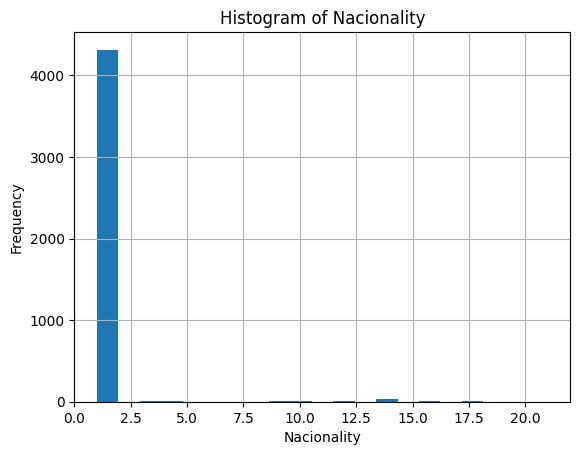

The percentage of Portuguese in the Nacionality column is 97.51%
The percentage of domestic students in the International column is 97.51%


In [8]:
# Histogram of Nationality
data["Nacionality"].hist(bins=21) # 21 bins because there are 21 values
plt.xlabel("Nacionality")
plt.ylabel("Frequency")
plt.title("Histogram of Nacionality")
plt.show()

value = 1 # Value of Portuguese
percentage = data[data["Nacionality"] == value].shape[0] / data.shape[0] * 100
print("The percentage of Portuguese in the Nacionality column is {:.2f}%".format(percentage))

value = 0 # Value of no
percentage = data[data["International"] == value].shape[0] / data.shape[0] * 100
print("The percentage of domestic students in the International column is {:.2f}%".format(percentage))

Nationality is a numeric and discrete attribute in this dataset. It is clear that most students are from one of the first country listed, Portugal in this case. The exact number of Portuguese students is 97.51%. Checking that percentage against the International column leads to the conclusion that all students are enrolled in Portuguese universities. Because the vast majority are domestic students, the prediction algorithm might have a strong bias against international students.

In [9]:
# Drop International and Nacionality columns
data = data.drop(columns=["International", 'Nacionality'])

In [10]:
data
data_nominal = data.replace({
    'Marital status': {1:'Single',2:'Married',3:'Widower',4:'Divorced',5:'Facto Union',6:'Legally Seperated'},
    'Course': {1:'Biofuel Production Technologies',2:'Animation and MultiMedia Design',3:'Social Service (evening attendance)',4:'Agronomy',5:'Communication Design',6:'Veterinary Nursing',7:'Informatics Engineering',8:'Equiniculture',9:'Management',10:'Social Service',11:'Tourism',12:'Nursing',13:'Oral Hygiene',14:'Advertising/Marketing Management',15:'Journalism & Communication',16:'Basic Education',17:'Management (evening attendance)'},
    'Gender': {0:'Female',1:'Male'}
    })

# print(data_nominal.columns.values)
data_nominal.describe(include='all')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Displaced,Educational special needs,Debtor,Tuition fees up to date,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
count,4424,4424.000000,4424.000000,4424,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,6,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Single,NaN,NaN,Nursing,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,3919,NaN,NaN,766,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,NaN,6.886980,1.727848,NaN,0.890823,2.531420,0.548373,0.011528,0.113698,0.880651,...,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,NaN
std,NaN,5.298964,1.313793,NaN,0.311897,3.963707,0.497711,0.106760,0.317480,0.324235,...,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,NaN
min,NaN,1.000000,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,NaN
50%,NaN,8.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,NaN
75%,NaN,12.000000,2.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,NaN


## Correlation Matrix

<AxesSubplot: >

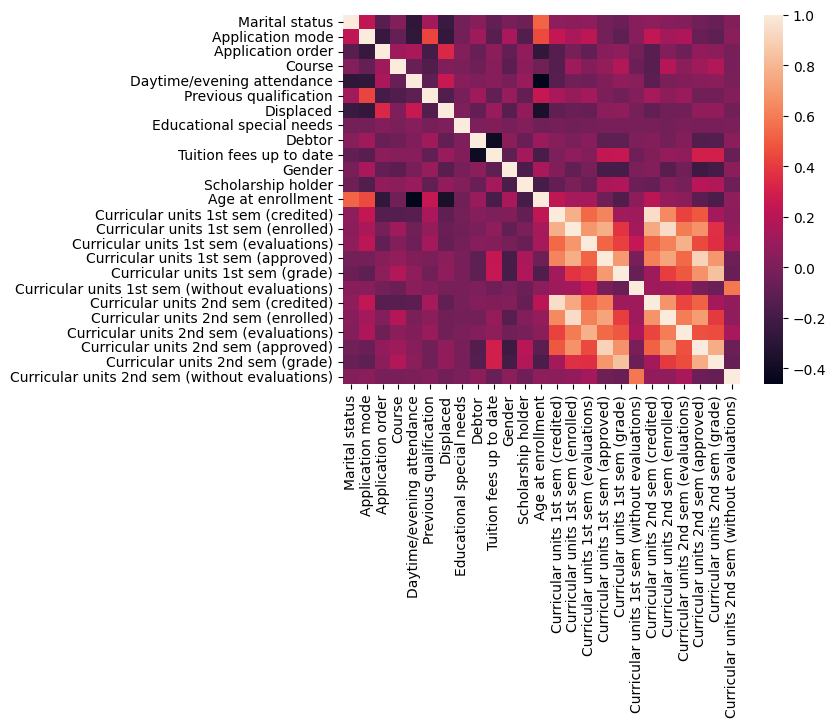

In [11]:
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline


data_correlation = data.corr(numeric_only=True)

# plot the heatmap
sns.heatmap(data_correlation, 
        xticklabels=data_correlation.columns,
        yticklabels=data_correlation.columns)

## Exceptional Work

In [12]:
# PCA, non lineart PCA 

## References
https://valoriza.ipportalegre.pt/piaes/features-info-stats.html - Dataset feature description <br/>
https://www.mdpi.com/2306-5729/7/11/146 - Article for the study<br/>
https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention?resource=download - Kaggle